In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import sys
import numpy as np
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')
from utils import deserialize, serialize

## Baselines

In [6]:
from test_signal import load_stat_dict
baseline_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/dummy_baseline_stats.obj"
baseline_dict = load_stat_dict(baseline_dict_path)

loading stat dict...


In [7]:
len(baseline_dict.keys())

30

In [8]:
G_dir = "/scr/biggest/gmachi/datasets/celldive_lung/for_ml/for_prospect/"
label_path = "/scr/biggest/gmachi/datasets/celldive_lung/processed/label_dict.obj"
label_dict = deserialize(label_path)

### run if you want more baselines

In [9]:
# from test_signal import dummy_baseline
# idx = 0
# for size_range in [(1,1), (1,50), (1,100), (1,200), (1,500), (1,1000), (50,100), (100,200), (200,500), (500,1000)]:
#     for num_samples in [3, 10, 25]:
#         print(f"idx: {idx}")
#         dummy_baseline(G_dir, label_dict, size_range, num_samples, baseline_dict_path)
#         idx += 1
# for cutoff in [0]: #[0, 1, 10, 25]: # replicates, not actually cutoff


## Process results

In [10]:
# results_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/obsolete/cc_stat_dict_before_parallel.obj"
# results_dict = deserialize(results_dict_path)

In [11]:
# results_dict.keys()

In [12]:
results_dict = {}
results_dicts_path = "/scr/biggest/gmachi/datasets/celldive_lung/analysis_cache"
for file_str in os.listdir(results_dicts_path):
    if "stat_dict" not in file_str:
        continue
    rd = deserialize(os.path.join(results_dicts_path, file_str))
    results_dict[file_str.split(".stat_dict")[0]] = rd
    

In [13]:
# results_dict

In [14]:
# baseline_dict_path = "/scr/gmachi/prospection/K2/notebooks/spatial-bio/cc_stat_dict_BASELINES.obj"
# baseline_dict = deserialize(baseline_dict_path)

In [15]:
# filtered_dict = {}
# real_model_count = 0
# for idx, model in enumerate(results_dict.keys()):
#     print()
#     print(idx, model)
#     if type(results_dict[model]) == list or results_dict[model] == {}:
#         print("no success")
#         continue
#     else:
#         print("success!")
#     # for metric in results_dict[model]:
#         # print(metric)
#         # print(results_dict[model][metric])
#     filtered_dict[(model, idx)] = results_dict[model]
#     real_model_count += 1


In [16]:
# real_model_count

In [17]:
# aucs = [v["auc_score"][0] for v in filtered_dict.values()]
# scores = [v["auc_score"][1] for v in filtered_dict.values()]
# aucs1 = [v["auc_score_c1"][0] for v in filtered_dict.values()]
# scores1 = [v["auc_score_c1"][1] for v in filtered_dict.values()]
# aucs10 = [v["auc_score_c10"][0] for v in filtered_dict.values()]
# scores10 = [v["auc_score_c10"][1] for v in filtered_dict.values()]
# aucs25 = [v["auc_score_c25"][0] for v in filtered_dict.values()]
# scores25 = [v["auc_score_c25"][1] for v in filtered_dict.values()]

In [18]:
# # tnrs = [np.median(v["tnr"]) for v in filtered_dict.values()]


# tnrs = []
# for v in filtered_dict.values():
#     fprs = np.array(v["tnr"])
#     tnrs.append(np.median(1 - fprs))
    
# prevs = [np.median(v["prev"]) for v in filtered_dict.values()]
# disps = [np.median(v["disp"]) for v in filtered_dict.values()]
# idxs = [k[1] for k in filtered_dict.keys()]

In [19]:
# len(aucs)

## Plot the characteristics vs performance

In [20]:
# import seaborn as sns
# def setup_figure(width=3, height=3):
#     sns.set(style='white')
#     sns.set_context('paper')
#     plt.figure(figsize=(width,height))

In [21]:
# from scipy.interpolate import griddata
# Z = griddata((prevs, disps), tnrs, (prevs, disps), method='linear')
# Z.shape

In [22]:
# import matplotlib.pyplot as plt

# # Create scatter plot
# plt.figure(figsize=(4,3))
# top_idx = int(np.argmax(tnrs))
# # plt.tricontour(prevs, disps, tnrs)
# plt.scatter(prevs, disps, c=tnrs, s=80, alpha=0.6, cmap='viridis', vmin=0, vmax=1)
# plt.colorbar()
# text = [str(i) for i in idxs] 
# # Loop for annotation of all points 
# plt.annotate(text[top_idx], (prevs[top_idx]-0.02, disps[top_idx]-1.7)) 

# # Add labels and title
# plt.xlabel('Median Class-1 RP', fontsize=13)
# plt.ylabel('Median Class-1 MRD', fontsize=13)
# plt.title('Median Class-0 TNR per Model', fontsize=13)
# # Show plot
# plt.show()


In [23]:
# fig, axs = plt.subplots(2, 4, figsize=(10,5))
# text = [str(i) for i in idxs] 
# N = len(prevs)


# cutoffs = ["0", "1", "10", "25"]
# for i,metric in enumerate([aucs, aucs1, aucs10, aucs25]):
#     top_idx = int(np.argmax(metric))
#     axs[0,i].scatter(prevs, disps, c=metric, s=50, alpha=0.6, cmap='viridis', vmin=0.5, vmax=1)
#     axs[0,i].set_title("AUROC (c>" + cutoffs[i] + ")")
#     axs[0,i].set_xticks([])
#     if i > 0:
#         axs[0,i].set_yticks([])
#     axs[0,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 

# for i,metric in enumerate([scores, scores1, scores10, scores25]):
#     top_idx = int(np.argmax(metric))
#     im = axs[1,i].scatter(prevs, disps, c=metric, s=50, alpha=0.6, cmap='viridis', vmin=0.5, vmax=1)
#     axs[1,i].set_title("Acc (c>" + cutoffs[i] + ")")
#     if i > 0:
#         axs[1,i].set_yticks([])
#     axs[1,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 

# # im = axs[2,0].scatter(prevs, disps, c=tnrs, s=100, alpha=0.6, cmap='viridis', vmin=0.5, vmax=1)
# # for j in range(N): 
# #     axs[2,0].annotate(text[j], (prevs[j]+0.01, disps[j]+0.1)) 
    

# # Add labels and title
# fig.supxlabel('Median Class-1 RP', fontsize=13)
# fig.supylabel('Median Class-1 MRD', fontsize=13)
# plt.suptitle('Class-1 Region Predictiveness per Model', fontsize=13)
# # Show plot

# plt.tight_layout()

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

# plt.show()

## Plot with baselines

In [24]:
filtered_dict = {}
for idx, model in enumerate(results_dict.keys()):
    print()
    print(idx, model)
    if type(results_dict[model]) == list or results_dict[model] == {}:
        print("no success")
        continue
    else:
        print("success!")
    filtered_dict[(model, idx)] = results_dict[model]

real_model_count = idx + 0
        
for idx, model in enumerate(baseline_dict.keys()):
    print()
    synthetic_count = real_model_count + idx
    print(synthetic_count, model)
    for metric in baseline_dict[model]:
        filtered_dict[(model, synthetic_count)] = baseline_dict[model]
    


0 k13_r6_alpha10000000000.0000_tau0.00_lamnan
success!

1 k12_r3_alphanan_taunan_lam0.50
success!

2 k10_r2_alpha10000000000.0000_tau0.00_lamnan
success!

3 k11_r4_alphanan_taunan_lam0.50
success!

4 k15_r7_alpha10000000000.0000_tau0.00_lamnan
success!

5 k16_r7_alpha10000000000.0000_tau0.00_lamnan
success!

6 k17_r7_alpha10000000000.0000_tau0.00_lamnan
success!

7 k8_r1_alphanan_taunan_lam0.50
success!

8 k15_r3_alphanan_taunan_lam0.50
success!

9 k17_r8_alpha10000000000.0000_tau0.00_lamnan
success!

10 k11_r1_alpha10000000000.0000_tau0.00_lamnan
success!

11 k9_r6_alpha10000000000.0000_tau0.00_lamnan
success!

12 k19_r5_alpha10000000000.0000_tau0.00_lamnan
success!

13 k14_r5_alphanan_taunan_lam0.50
success!

14 k9_r5_alphanan_taunan_lam0.50
success!

15 k13_r5_alpha10000000000.0000_tau0.00_lamnan
success!

16 k16_r2_alpha10000000000.0000_tau0.00_lamnan
success!

17 k14_r8_alpha10000000000.0000_tau0.00_lamnan
success!

18 k11_r8_alpha10000000000.0000_tau0.00_lamnan
success!

19 k14_

In [25]:
real_model_count

207

In [26]:
# filtered_dict[("dummy_500-1000_10", 158)]

In [27]:
[v.keys() for v in filtered_dict.values()][0]

dict_keys(['prev', 'disp', 'tnr', 'auc_score_sal', 'auc_score', 'auc_score_c1', 'auc_score_c10', 'auc_score_c25'])

In [28]:
aucs_sal = [v["auc_score_sal"][0] for v in filtered_dict.values()]
scores_sal = [v["auc_score_sal"][1] for v in filtered_dict.values()]
aucs = [v["auc_score"][0] for v in filtered_dict.values()]
scores = [v["auc_score"][1] for v in filtered_dict.values()]
aucs1 = [v["auc_score_c1"][0] for v in filtered_dict.values()]
scores1 = [v["auc_score_c1"][1] for v in filtered_dict.values()]
aucs10 = [v["auc_score_c10"][0] for v in filtered_dict.values()]
scores10 = [v["auc_score_c10"][1] for v in filtered_dict.values()]
aucs25 = [v["auc_score_c25"][0] for v in filtered_dict.values()]
scores25 = [v["auc_score_c25"][1] for v in filtered_dict.values()]

In [29]:
# tnrs = [np.median(v["tnr"]) for v in filtered_dict.values()]
tnrs = []
for k,v in filtered_dict.items():
    if "dummy" in k[0]:
        tnrs.append(1.0)
    else:
        # fprs = np.array(v["tnr"])
        # tnrs.append(np.median(1 - fprs))
        tnrs.append(np.median(v["tnr"]))
    
prevs = [np.median(v["prev"]) for v in filtered_dict.values()]
disps = [np.median(v["disp"]) for v in filtered_dict.values()]
idxs = [k[1] for k in filtered_dict.keys()]
model_strs = [k[0] for k in filtered_dict.keys()]

In [30]:
# idxs

make a dataframe

In [31]:
import pandas as pd
# Combine the lists into a dictionary
data_dict = {
    'model': model_strs,
    'idx': idxs,
    'prevs': prevs,
    'disps': disps,
    'tnrs': tnrs,
    'aucs_sal': aucs_sal,
    'scores_sal': scores_sal,
    'aucs': aucs,
    'scores': scores,
    'aucs1': aucs1,
    'scores1': scores1,
    'aucs10': aucs10,
    'scores10': scores10,
    'aucs25': aucs25,
    'scores25': scores25
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data_dict)

In [32]:
df

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0,0.464494,4.287057,0.553268,1.000000,1.000000,0.807938,0.733755,0.814579,0.764218,0.941022,0.877551,0.984419,0.941909
1,k12_r3_alphanan_taunan_lam0.50,1,0.696350,0.573630,0.304700,0.989130,0.960784,0.751652,0.685770,0.692075,0.721649,0.72549,0.672,0.85755,0.746667
2,k10_r2_alpha10000000000.0000_tau0.00_lamnan,2,0.426303,4.338600,0.589455,1.000000,1.000000,0.814880,0.736927,0.8218,0.779052,0.925158,0.854103,0.97527,0.931818
3,k11_r4_alphanan_taunan_lam0.50,3,0.519525,3.237092,0.462827,0.991582,0.921569,0.727690,0.662939,0.685697,0.700622,0.745225,0.702869,0.764828,0.699248
4,k15_r7_alpha10000000000.0000_tau0.00_lamnan,4,0.509624,2.766884,0.487516,1.000000,1.000000,0.796098,0.725646,0.777251,0.755351,0.904366,0.831266,0.974751,0.904255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,dummy_200-500_10,232,0.243274,0.006844,1.000000,0.618421,0.588235,0.601040,0.606299,0.461938,0.431373,0.515674,0.509804,0.661184,0.588235
234,dummy_200-500_25,233,0.497417,0.000438,1.000000,0.389803,0.411765,0.593073,0.583465,0.495161,0.509804,0.479814,0.509804,0.5625,0.627451
235,dummy_500-1000_3,234,0.150972,0.004773,1.000000,0.609568,0.568627,0.548589,0.562092,0.493789,0.490196,0.645161,0.588235,0.596825,0.54902
236,dummy_500-1000_10,235,0.424477,0.000533,1.000000,0.565744,0.588235,0.623011,0.578740,0.455385,0.470588,0.468254,0.509804,0.407692,0.352941


In [33]:
df = df.applymap(lambda x: np.nan if x in ["n","o"] else x)

/tmp/user/22736/ipykernel_3196894/2571074037.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if x in ["n","o"] else x)


In [34]:
df["style"] = df["model"].apply(lambda x: "prospected" if x in results_dict.keys() else "synthetic")

In [35]:
df.tail()

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
233,dummy_200-500_10,232,0.243274,0.006844,1.0,0.618421,0.588235,0.601040,0.606299,0.461938,0.431373,0.515674,0.509804,0.661184,0.588235,synthetic
234,dummy_200-500_25,233,0.497417,0.000438,1.0,0.389803,0.411765,0.593073,0.583465,0.495161,0.509804,0.479814,0.509804,0.562500,0.627451,synthetic
235,dummy_500-1000_3,234,0.150972,0.004773,1.0,0.609568,0.568627,0.548589,0.562092,0.493789,0.490196,0.645161,0.588235,0.596825,0.549020,synthetic
236,dummy_500-1000_10,235,0.424477,0.000533,1.0,0.565744,0.588235,0.623011,0.578740,0.455385,0.470588,0.468254,0.509804,0.407692,0.352941,synthetic
237,dummy_500-1000_25,236,0.735836,0.000242,1.0,0.628028,0.647059,0.673843,0.651181,0.475155,0.490196,0.480952,0.509804,0.378882,0.392157,synthetic


In [36]:
df_prospect = df[df["style"] == "prospected"]
df_synthetic = df[df["style"] == "synthetic"]

In [37]:
nan_df = df[df['aucs1'].isna()]
non_nan_df = df[~df['aucs1'].isna()]

In [38]:
# df.to_csv("/scr/gmachi/prospection/K2/notebooks/spatial-bio/outputs/model_select/model_select_parallel.csv")

In [39]:
df[df["model"].str.contains("k")].shape

(208, 16)

In [40]:
for k in range(8,21):
    done = df[df["model"].str.contains("k"+str(k))].shape[0]
    if done == 16:
        addendum = "==> DONE!"
    else:
        addendum = "========> IN PROGRESS..."
    print("completed analysis for k =", k, ":", done, "/ 16 models " + addendum)

completed analysis for k = 8 : 16 / 16 models ==> DONE!
completed analysis for k = 9 : 16 / 16 models ==> DONE!
completed analysis for k = 10 : 16 / 16 models ==> DONE!
completed analysis for k = 11 : 16 / 16 models ==> DONE!
completed analysis for k = 12 : 16 / 16 models ==> DONE!
completed analysis for k = 13 : 16 / 16 models ==> DONE!
completed analysis for k = 14 : 16 / 16 models ==> DONE!
completed analysis for k = 15 : 16 / 16 models ==> DONE!
completed analysis for k = 16 : 16 / 16 models ==> DONE!
completed analysis for k = 17 : 16 / 16 models ==> DONE!
completed analysis for k = 18 : 16 / 16 models ==> DONE!
completed analysis for k = 19 : 16 / 16 models ==> DONE!
completed analysis for k = 20 : 16 / 16 models ==> DONE!


set colors

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# cmap = mpl.colormaps.get_cmap('viridis')  # viridis is the default colormap for imshow
# cmap = sns.color_palette('viridis', as_cmap=True)
# cmap = plt.get_cmap('viridis')
# cmap = sns.color_palette("viridis").as_hex()
# cmap.set_bad(color='gray')
# cmap="viridis"


import seaborn as sns
import matplotlib.cm
import matplotlib.colors

cmap = plt.get_cmap('viridis')
cmap.set_bad(color='gray')
# matplotlib.cm.register_cmap("mycolormap3", cmap)
# cpal = sns.color_palette("mycolormap3", n_colors=64)

cpal = cmap


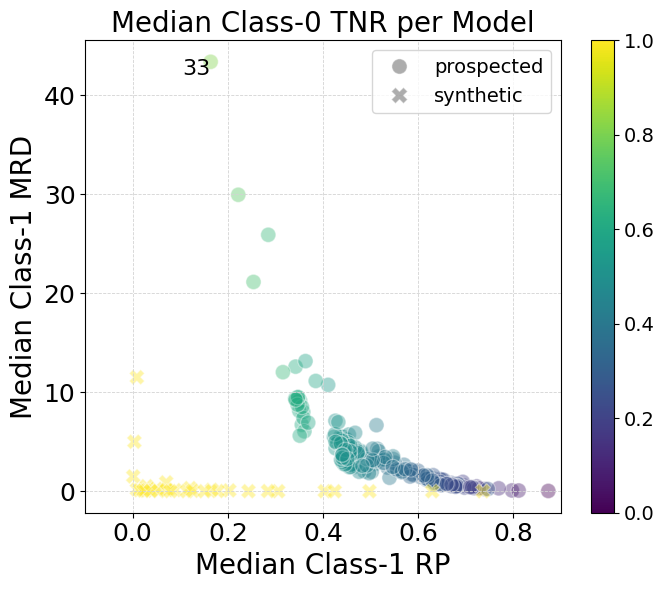

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(7,6))
df_under1 = df[df["tnrs"] < 1.0]
top_row = df_under1['tnrs'].idxmax()
top_idx = top_row

ax = sns.scatterplot(x='prevs', y='disps', hue="tnrs", s=120, alpha=0.4, data=df, style="style", palette=cpal)

# ax.figure.colorbar(sm)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    ax=ax,
)
cbar.ax.tick_params(labelsize=14) 

text = list(df["idx"])
# Loop for annotation of all points 
plt.annotate(text[top_idx], (prevs[top_idx]-0.06, disps[top_idx]-1.3), fontsize=16) 
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.yaxis.grid(color='lightgray', linestyle='--', linewidth=0.6)
ax.xaxis.grid(color='lightgray', linestyle='--', linewidth=0.6)

hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
    if l in ['synthetic', 'prospected']:
        lablout.append(l)
        handout.append(h)
ax.legend(handout, lablout, prop={'size': 14})

ax.set_xlim([-0.1, 0.9]) 
# ax.set_ylim([-1, 10])  

# Add labels and title
plt.xlabel('Median Class-1 RP', fontsize=20)
plt.ylabel('Median Class-1 MRD', fontsize=20)
plt.title('Median Class-0 TNR per Model', fontsize=20)
# Show plot
plt.tight_layout()
plt.show()

Note: This could be misleading. These are not higher for prospectors as an artifact of doing otsu thresholding even for class-0 data. Regardless of prospect map values, a threshold is found and used to select foreground and background. This is really not super helpful. Would rather make threshold as $>0$ top get all negative values in heatmap. For this reason, let's exclude for now.  


/tmp/user/22736/ipykernel_3196894/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_3196894/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_3196894/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,i].legend().set_visible(False)
/tmp/user/22736/ipykernel_3196894/3501475546.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

[<matplotlib.lines.Line2D object at 0x7f9d9026d540>, <matplotlib.lines.Line2D object at 0x7f9d902ac100>] ['prospected', 'synthetic']


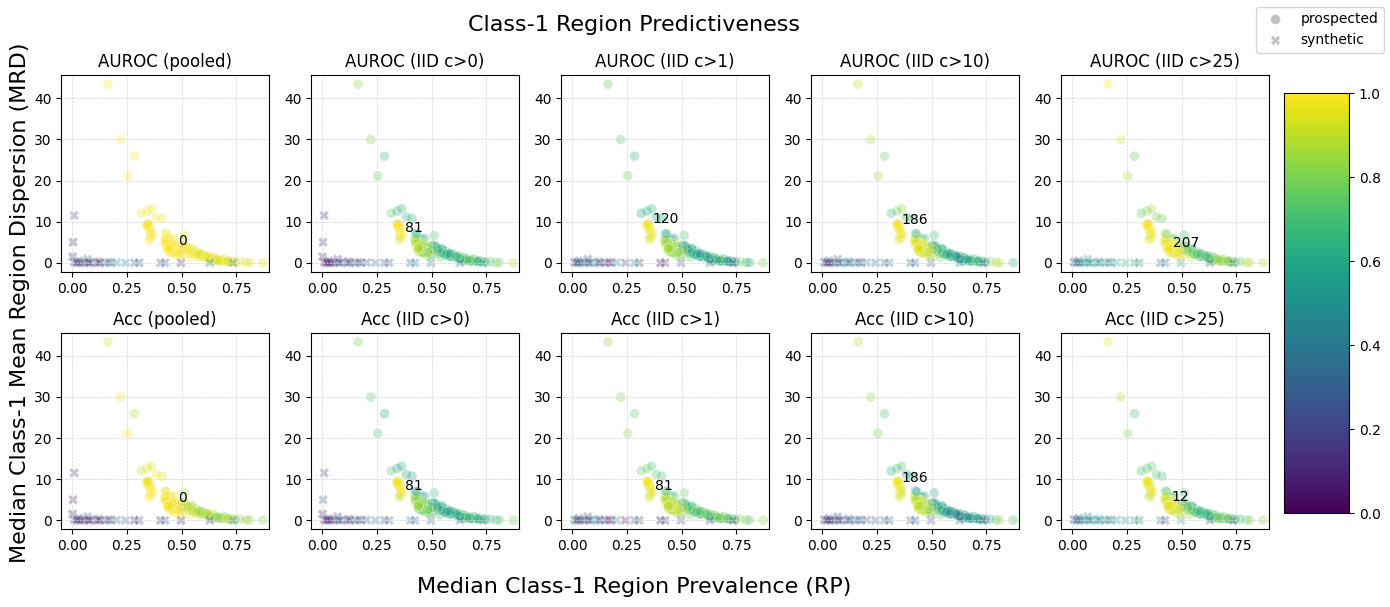

In [43]:
from matplotlib import cm

fig, axs = plt.subplots(2, 5, figsize=(13,6))
# text = [str(i) for i in idxs] 
text = list(df["idx"])
N = len(prevs)
# auc_data = [aucs, aucs1, aucs10, aucs25]
# score_data = [scores, scores1, scores10, scores25]

cutoffs = ["0", "1", "10", "25"]
for i,metric in enumerate(["aucs_sal", "aucs", "aucs1", "aucs10", "aucs25"]):
    axs[0,i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    axs[0,i].xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    metric_data = df[metric]
    top_idx = int(np.nanargmax(metric_data))
    # print(top_idx)
    # print(df.iloc[top_idx,:])
    sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=False, style="style", palette=cpal, ax=axs[0,i])
    # sns.scatterplot(x='prevs', y='disps', s=50, alpha=0.4, data=nan_df, legend=False, marker="x", color="gray", ax=axs[0,i])
    if i == 0:
        axs[0,i].set_title("AUROC (pooled)")
    else:
        axs[0,i].set_title("AUROC (IID c>" + cutoffs[i-1] + ")")
    # axs[0,i].set_xticks([])
    # if i > 0:
    #     axs[0,i].set_yticks([])
    axs[0,i].set_xlabel('')
    axs[0,i].set_ylabel('')
    
    # axs[0,i].set_xlim([-0.1, 1])     
    axs[0,i].set_xlim([-0.05, 0.9]) 
    # axs[0,i].set_ylim([-1, 10])  
    axs[0,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 

for i,metric in enumerate(["scores_sal", "scores", "scores1", 'scores10', 'scores25']):
    axs[1,i].yaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    axs[1,i].xaxis.grid(color='lightgray', linestyle='--', linewidth=0.5)
    metric_data = df[metric]
    top_idx = int(np.nanargmax(metric_data))
    # print(top_idx)
    legend = False
    if i == 4:
        legend = True
    im = sns.scatterplot(x='prevs', y='disps', hue=metric, s=50, alpha=0.3, data=df, legend=legend, style="style", palette=cpal, ax=axs[1,i])
    # if legend == True:
    axs[1,i].legend().set_visible(False)
    
    im.collections[0].cmap.set_bad('grey')
    if i == 0:
        axs[1,i].set_title("Acc (pooled)")
    else:
        axs[1,i].set_title("Acc (IID c>" + cutoffs[i-1] + ")")
    # if i > 0:
        # axs[1,i].set_yticks([])
    axs[1,i].set_xlabel('')
    axs[1,i].set_ylabel('')
    
    axs[1,i].set_xlim([-0.05, 0.9]) 
    # axs[1,i].set_ylim([-1, 10])     
    axs[1,i].annotate(text[top_idx], (prevs[top_idx]+0.02, disps[top_idx]+0.1)) 
    


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
fig.colorbar(cm.ScalarMappable(norm=None, cmap="viridis"), cax=cbar_ax)


hand, labl = im.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
    if l in ['synthetic', 'prospected']:
        lablout.append(l)
        handout.append(h)
print(handout, lablout)
fig.legend(handout, lablout, prop={'size': 10})


fig.supxlabel('Median Class-1 Region Prevalence (RP)', fontsize=16)
fig.supylabel('Median Class-1 Mean Region Dispersion (MRD)', fontsize=16)
plt.suptitle('Class-1 Region Predictiveness', fontsize=16)

plt.tight_layout()

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.show()

In [44]:
df[df["idx"] == 81] 


,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
81,k9_r3_alpha10000000000.0000_tau0.00_lamnan,81,0.358767,7.39696,0.648615,1.0,1.0,0.858006,0.790121,0.86561,0.798874,0.933457,0.864035,0.974111,0.913165,prospected


In [45]:
df[df["idx"] == 0] 


,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0,0.464494,4.287057,0.553268,1.0,1.0,0.807938,0.733755,0.814579,0.764218,0.941022,0.877551,0.984419,0.941909,prospected


In [46]:
df[df["idx"] == 120] 

,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style
120,k9_r7_alpha10000000000.0000_tau0.00_lamnan,120,0.347747,9.504966,0.658231,0.998462,0.960784,0.856431,0.7892,0.868475,0.794314,0.952307,0.893701,0.964677,0.914956,prospected


# Try radar plots

In [47]:
prospected_df = df[df["style"] == "prospected"]
prospected_df["k"] = prospected_df["model"].apply(lambda x: x.split("_")[0].split("k")[1])
prospected_df["r"] = prospected_df["model"].apply(lambda x: x.split("_")[1].split("r")[1])
prospected_df.head()

/tmp/user/22736/ipykernel_3196894/4103140114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prospected_df["k"] = prospected_df["model"].apply(lambda x: x.split("_")[0].split("k")[1])
/tmp/user/22736/ipykernel_3196894/4103140114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prospected_df["r"] = prospected_df["model"].apply(lambda x: x.split("_")[1].split("r")[1])


,model,idx,prevs,disps,tnrs,aucs_sal,scores_sal,aucs,scores,aucs1,scores1,aucs10,scores10,aucs25,scores25,style,k,r
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0,0.464494,4.287057,0.553268,1.000000,1.000000,0.807938,0.733755,0.814579,0.764218,0.941022,0.877551,0.984419,0.941909,prospected,13,6
1,k12_r3_alphanan_taunan_lam0.50,1,0.696350,0.573630,0.304700,0.989130,0.960784,0.751652,0.685770,0.692075,0.721649,0.725490,0.672000,0.857550,0.746667,prospected,12,3
2,k10_r2_alpha10000000000.0000_tau0.00_lamnan,2,0.426303,4.338600,0.589455,1.000000,1.000000,0.814880,0.736927,0.821800,0.779052,0.925158,0.854103,0.975270,0.931818,prospected,10,2
3,k11_r4_alphanan_taunan_lam0.50,3,0.519525,3.237092,0.462827,0.991582,0.921569,0.727690,0.662939,0.685697,0.700622,0.745225,0.702869,0.764828,0.699248,prospected,11,4
4,k15_r7_alpha10000000000.0000_tau0.00_lamnan,4,0.509624,2.766884,0.487516,1.000000,1.000000,0.796098,0.725646,0.777251,0.755351,0.904366,0.831266,0.974751,0.904255,prospected,15,7


In [48]:
columns = ["model", "prevs", "disps", "aucs", "scores", "k", "r"]
metrics_df = prospected_df[columns]

metrics_df["inv_prevs"] = metrics_df["prevs"]
metrics_df["inv_prevs"] = metrics_df["inv_prevs"].apply(lambda x: 1 - x)

metrics_df["inv_k"] = metrics_df["k"]
metrics_df["inv_k"] = metrics_df["inv_k"].apply(lambda x: 1.0 / (1.0 + int(x)))
min_k = metrics_df["inv_k"].min()
max_k = metrics_df["inv_k"].max()
metrics_df["fs_k"] = metrics_df["inv_k"].apply(lambda x: (x - min_k) / (max_k - min_k))

metrics_df["inv_r"] = metrics_df["r"]
metrics_df["inv_r"] = metrics_df["inv_r"].apply(lambda x: 1.0 / (1.0 + int(x)))
min_r = metrics_df["inv_r"].min()
max_r = metrics_df["inv_r"].max()
metrics_df["fs_r"] = metrics_df["inv_r"].apply(lambda x: (x - min_r) / (max_r - min_r))

metrics_df["inv_disps"] = metrics_df["disps"]
metrics_df["inv_disps"] = metrics_df["inv_disps"].apply(lambda x: 1.0 / (1.0 + x))
min_d = metrics_df["inv_disps"].min()
max_d = metrics_df["inv_disps"].max()
metrics_df["fs_disps"] = metrics_df["inv_disps"].apply(lambda x: (x - min_d) / (max_d - min_d))

metrics_df.head()


/tmp/user/22736/ipykernel_3196894/111817104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df["inv_prevs"] = metrics_df["prevs"]
/tmp/user/22736/ipykernel_3196894/111817104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df["inv_prevs"] = metrics_df["inv_prevs"].apply(lambda x: 1 - x)
/tmp/user/22736/ipykernel_3196894/111817104.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,model,prevs,disps,aucs,scores,k,r,inv_prevs,inv_k,fs_k,inv_r,fs_r,inv_disps,fs_disps
0,k13_r6_alpha10000000000.0000_tau0.00_lamnan,0.464494,4.287057,0.807938,0.733755,13,6,0.535506,0.071429,0.375000,0.142857,0.081633,0.189141,0.175847
1,k12_r3_alphanan_taunan_lam0.50,0.696350,0.573630,0.751652,0.685770,12,3,0.303650,0.076923,0.461538,0.250000,0.357143,0.635474,0.646924
2,k10_r2_alpha10000000000.0000_tau0.00_lamnan,0.426303,4.338600,0.814880,0.736927,10,2,0.573697,0.090909,0.681818,0.333333,0.571429,0.187315,0.173919
3,k11_r4_alphanan_taunan_lam0.50,0.519525,3.237092,0.727690,0.662939,11,4,0.480475,0.083333,0.562500,0.200000,0.228571,0.236011,0.225315
4,k15_r7_alpha10000000000.0000_tau0.00_lamnan,0.509624,2.766884,0.796098,0.725646,15,7,0.490376,0.062500,0.234375,0.125000,0.035714,0.265471,0.256409


In [55]:
sample_df = metrics_df.copy()

n = 1
sort_scores_df = sample_df.copy()
sort_scores_df = sort_scores_df.sort_values('scores', ascending=False)
sliced_scores_df = pd.concat([sort_scores_df.head(n), sort_scores_df.tail(n)])

sort_aucs_df = sample_df.copy()
sort_aucs_df = sort_aucs_df.sort_values('aucs', ascending=False)
sliced_aucs_df = pd.concat([sort_aucs_df.head(n), sort_aucs_df.tail(n)])

# sort_k_df = sample_df.copy()
# sort_k_df = sort_k_df.sort_values('fs_k', ascending=False)
# sliced_k_df = pd.concat([sort_k_df.head(n), sort_k_df.tail(n)])

# sort_p_df = sample_df.copy()
# sort_p_df = sort_p_df.sort_values('inv_prevs', ascending=False)
# sliced_p_df = pd.concat([sort_p_df.head(n), sort_p_df.tail(n)])

# sort_d_df = sample_df.copy()
# sort_d_df = sort_d_df.sort_values('fs_disps', ascending=False)
# sliced_d_df = pd.concat([sort_d_df.head(n), sort_d_df.tail(n)])

# sort_r_df = sample_df.copy()
# sort_r_df = sort_r_df.sort_values('fs_r', ascending=False)
# sliced_r_df = pd.concat([sort_r_df.head(n), sort_r_df.tail(n)])


sample_df = pd.concat([sliced_scores_df, sliced_aucs_df])


# sample_df = pd.concat([sliced_scores_df, sliced_aucs_df, sliced_k_df, sliced_p_df, sliced_d_df, sliced_r_df])
# sample_df = pd.concat([sliced_scores_df, sliced_aucs_df])
# sample_df = sample_df.sample(5)
sample_df = sample_df.drop_duplicates()
sample_df

,model,prevs,disps,aucs,scores,k,r,inv_prevs,inv_k,fs_k,inv_r,fs_r,inv_disps,fs_disps
81,k9_r3_alpha10000000000.0000_tau0.00_lamnan,0.358767,7.396960,0.858006,0.790121,9,3,0.641233,0.100000,0.825,0.250000,0.357143,0.119091,0.101913
13,k14_r5_alphanan_taunan_lam0.50,0.570150,2.675340,0.690321,0.636776,14,5,0.429850,0.066667,0.300,0.166667,0.142857,0.272084,0.263388
177,k20_r7_alphanan_taunan_lam0.50,0.530498,3.460905,0.689201,0.644598,20,7,0.469502,0.047619,0.000,0.125000,0.035714,0.224170,0.212817


In [56]:
columns = ["model", "inv_prevs", "fs_disps", "aucs", "scores", "fs_k", "fs_r"]
sample_df = sample_df[columns]
sample_df

,model,inv_prevs,fs_disps,aucs,scores,fs_k,fs_r
81,k9_r3_alpha10000000000.0000_tau0.00_lamnan,0.641233,0.101913,0.858006,0.790121,0.825,0.357143
13,k14_r5_alphanan_taunan_lam0.50,0.429850,0.263388,0.690321,0.636776,0.300,0.142857
177,k20_r7_alphanan_taunan_lam0.50,0.469502,0.212817,0.689201,0.644598,0.000,0.035714


In [104]:
#adapted from: https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python

import numpy as np
from math import pi

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=12)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


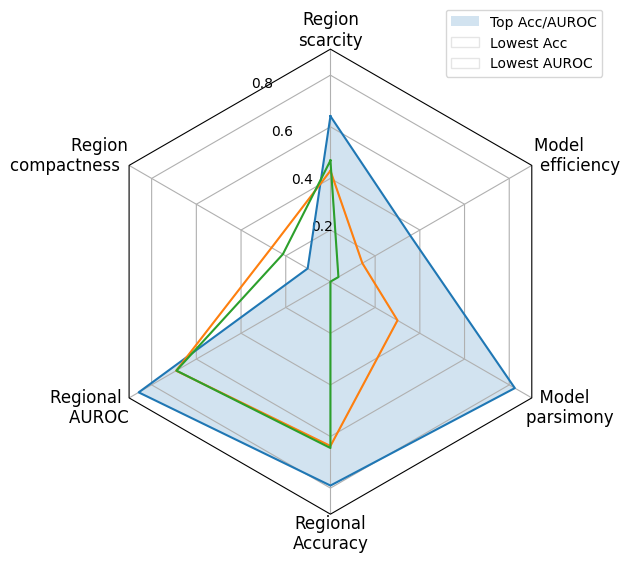

In [140]:
data = [["Region\nscarcity", "Region"+" "*5+"\ncompactness"+" "*18, "Regional"+" "*10+"\nAUROC"+" "*5,
         "Regional\nAccuracy", " "*6+"Model\n"+" "*8+"parsimony", " "*4+"Model\n"+" "*12+"efficiency"],
        ('Prospector\nSelection', list(sample_df.values[:,1:]))]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
# ax.set_title(title,  position=(0.1, -0.5), ha='center', fontsize=16)

for i,d in enumerate(case_data):
    line = ax.plot(theta, d)
    if i == 0:
        ax.fill(theta, d, alpha=0.2, label='Top Acc/AUROC')
    else:
        if i == 1:
            l = "Lowest Acc"
        else:
            l = "Lowest AUROC"
        ax.fill(theta, d, alpha=0.1, fill=False, label=l)

ax.set_varlabels(spoke_labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

[0.8580063188722477, 0.865610099138966, 0.9334567051127561, 0.9741110616373004, 1.0]


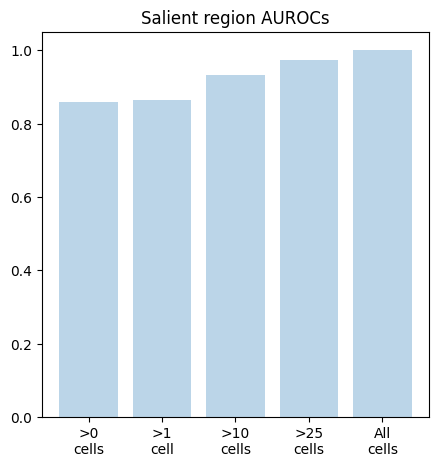

In [153]:
res = df[df["idx"] == 81]
region_aucs = [res["aucs"].values[0], res["aucs1"].values[0], res["aucs10"].values[0], res["aucs25"].values[0], res["aucs_sal"].values[0]] 
print(region_aucs)
# region_aucs = [0.86, 0.87, 0.93, 0.97, 1]
plt.figure(figsize=(5,5))
plt.bar(np.arange(5), region_aucs, color='C0', alpha=0.3)
plt.xticks(np.arange(5), [">0\ncells", ">1\ncell", ">10\ncells", ">25\ncells", "All\ncells"], rotation=0)
plt.title("Salient region AUROCs")
plt.show()